# Detecting Human Faces

Before anything else, a PiCamera has to be connected to the Raspberry Pi.

In this notebook, we are using pre-trained Haar-Cascade classifiers for human faces and eyes. These pretrained classifiers which come with `opencv` are stored in an XML format.

In [1]:
import picamera
from picamera import PiCamera
import matplotlib.pyplot as plt
from picamera.array import PiRGBArray
import numpy as np
import cv2 as cv
import IPython
import io
import time
from PIL import Image

Since we are reading a continuous stream of RGB photos taken from the video port, we also need to display them continuously. For this matter we need the following function to do this.

In [2]:
# Use 'jpeg' instead of 'png' (~5 times faster)
def showarray(a, fmt='jpeg'):
    '''
    Function to display an image within a Jupyter notebook.
    '''
    im_array = np.asarray(a)
    plt.imshow(im_array)
    plt.show()

Now, let's load up the classifiers for eyes and faces. These 2 files should be located in the current directory.

In [3]:
body_cascade = cv.CascadeClassifier('haarcascade_upperbody.xml')
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_alt.xml')
eye_cascade = cv.CascadeClassifier('haarcascade_eye.xml')

The following function is used to detect the human faces and eyes. `detectMultiScale` returns a list of coordinates where it detected something and if there's something, then it proceeds drawing green and red rectangles around the detected features. The image that now contains these red/green boxes is returned to where it got called.

In [4]:
def detectFacesAndEyes(img_array):
    '''
    Function to detect eyes and faces using a Haar-Cascade classifier.
    '''
    gray = cv.cvtColor(img_array, cv.COLOR_BGR2GRAY)
    body = body = body_cascade.detectMultiScale(gray,scaleFactor = 1.01,minNeighbors = 5,flags = cv.CASCADE_SCALE_IMAGE)
    for (x,y,w,h) in body:
        cv.rectangle(img_array,(x,y),(x+w,y+h),(0,0,255),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img_array[y:y+h, x:x+w]
        faces = face_cascade.detectMultiScale(roi_gray)
        for (fx,fy,fw,fh) in faces:
            cv.rectangle(roi_color,(fx,fy),(fx+fw,fy+fh),(0,255,0),2)
            roi_gray_face = roi_gray[y:y+h, x:x+w]
            roi_color_face = roi_color[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray_face)
            for (ex,ey,ew,eh) in eyes:
                cv.rectangle(roi_color_face,(ex,ey),(ex+ew,ey+eh),(255,0,0),2)

Capture frames at the highest rate possible and on each frame run the Haar-Cascade detection system.

Finally, on each iteration, the image gets to be displayed in JupyterLab.

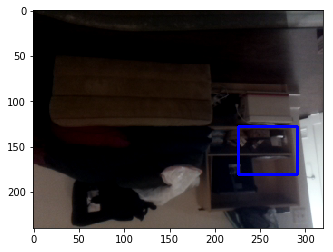

In [ ]:
# initialize the camera and grab a reference to the raw camera capture
camera = PiCamera()
camera.resolution = (320,240)
camera.framerate = 32
freshest_frame = PiRGBArray(camera, size=(320,240))

# allow the camera to warmup
time.sleep(0.1)


for frame in camera.capture_continuous(freshest_frame, format="rgb", use_video_port=True):
            img = frame.array
            
            detectFacesAndEyes(img)
            
            showarray(img)
            IPython.display.clear_output(wait = True)
            #cv.imshow("frame",img)
            #key = cv.waitKey(1) & 0xFF
            
            # clear the stream in preparation for the next frame
            freshest_frame.truncate(0)
            
            # if the `q` key was pressed, break from the loop
            #if key == ord("q"):
            #    break
                
            #showarray(freshest_frame)
            #IPython.display.clear_output(wait = True)